In [3]:
import numpy as np

In [1]:
def make_data(n_samples, n_features, cov_class_1, cov_class_2, seed=0):
    rng = np.random.RandomState(seed)
    X = np.concatenate(
        [
            rng.randn(n_samples, n_features) @ cov_class_1,
            rng.randn(n_samples, n_features) @ cov_class_2 + np.array([1, 1]),
        ]
    )
    y = np.concatenate([np.zeros(n_samples), np.ones(n_samples)])
    return X, y

In [14]:
rng = np.random.RandomState(0)
rng.randn(5, 5)

array([[ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799],
       [-0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ],
       [ 0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323],
       [ 0.33367433,  1.49407907, -0.20515826,  0.3130677 , -0.85409574],
       [-2.55298982,  0.6536186 ,  0.8644362 , -0.74216502,  2.26975462]])

In [15]:
covariance = np.array([[1, 0], [0, 1]])
X_isotropic_covariance, y_isotropic_covariance = make_data(
    n_samples=1_000,
    n_features=2,
    cov_class_1=covariance,
    cov_class_2=covariance,
    seed=0,
)

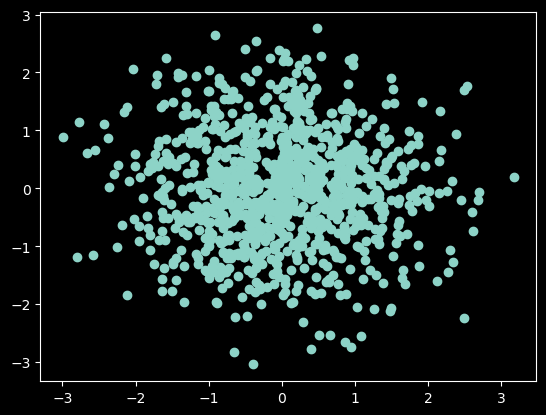

In [17]:
from matplotlib import pyplot as plt
#  In the first dataset, the two classes share the same covariance matrix, and this covariance matrix has the specificity of being spherical (isotropic)
plt.plot(X_isotropic_covariance[y_isotropic_covariance == 0, 0], X_isotropic_covariance[y_isotropic_covariance == 0, 1], "o")

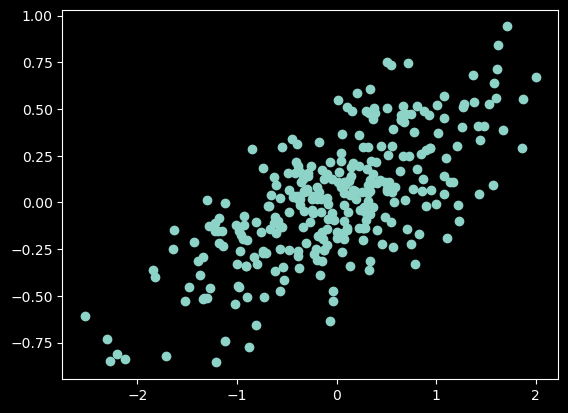

In [28]:
covariance = np.array([[0.0, -0.23], [0.83, 0.23]])
X_shared_covariance, y_shared_covariance = make_data(
    n_samples=300,
    n_features=2,
    cov_class_1=covariance,
    cov_class_2=covariance,
    seed=0,
)
plt.plot(X_shared_covariance[y_shared_covariance == 0, 0], X_shared_covariance[y_shared_covariance == 0, 1], "o")

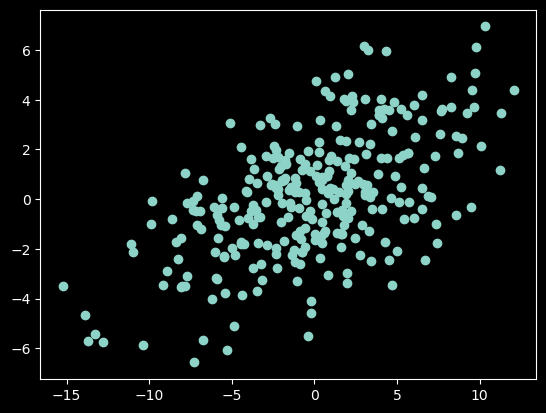

In [27]:
cov_class_1 = np.array([[0.0, -1.0], [2.5, 0.7]]) * 2.0
cov_class_2 = cov_class_1.T
X_different_covariance, y_different_covariance = make_data(
    n_samples=300,
    n_features=2,
    cov_class_1=cov_class_1,
    cov_class_2=cov_class_2,
    seed=0,
)
plt.plot(X_different_covariance[y_different_covariance == 0, 0], X_different_covariance[y_different_covariance == 0, 1], "o")

<h3>LDA vs PCA</h3>

In [45]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print(
    "PCA explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)
print("LDA explained variance ratio (first two components): %s" % str(lda.explained_variance_ratio_))

PCA explained variance ratio (first two components): [0.92461872 0.05306648]
LDA explained variance ratio (first two components): [0.9912126 0.0087874]


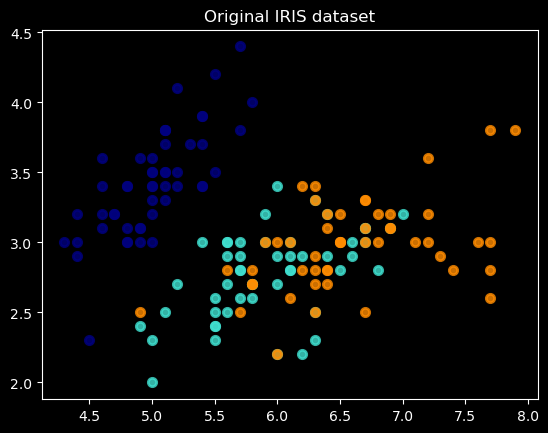

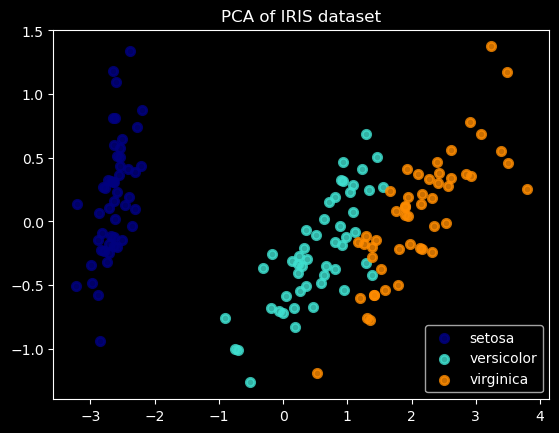

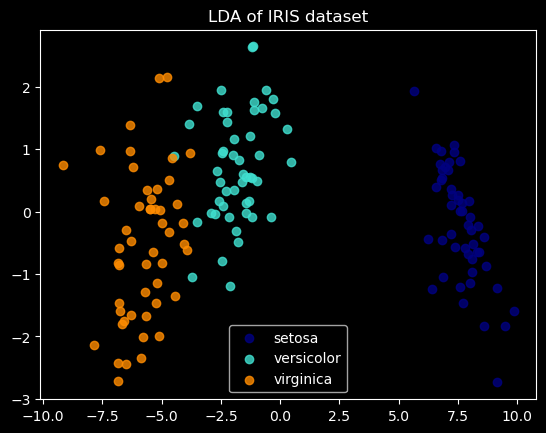

In [47]:
plt.figure()
lw = 2
for color, i, target_name in zip(["navy", "turquoise", "darkorange"], [0, 1, 2], target_names):
    plt.scatter(
        X[y == i, 0], X[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.title("Original IRIS dataset")

plt.figure()
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of IRIS dataset")

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r2[y == i, 0], X_r2[y == i, 1], alpha=0.8, color=color, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA of IRIS dataset")

plt.show()

In summary
 - PCA = Assume one class
 - LCA = multiclass, assume same covariance
 - QDA = multiclass, multiple covariance